In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
import kagglehub

try:
    path = kagglehub.dataset_download("mirajdeepbhandari/polynomial-regression")
    path = f"{path}\\Ice_cream selling data.csv"

    try:
        df = pd.read_csv(path, names=["Temp", "Sales"], header=0)
    except:
        raise error
# ["Temperature (°C)", "Ice Cream Sales (units)"]



KaggleApiHTTPError: 403 Client Error.

You don't have permission to access resource at URL: https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression. Please make sure you are authenticated if you are trying to access a private resource or a resource requiring consent.

In [ ]:
df.head()

,Temp,Sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


<Axes: xlabel='Temp', ylabel='Sales'>

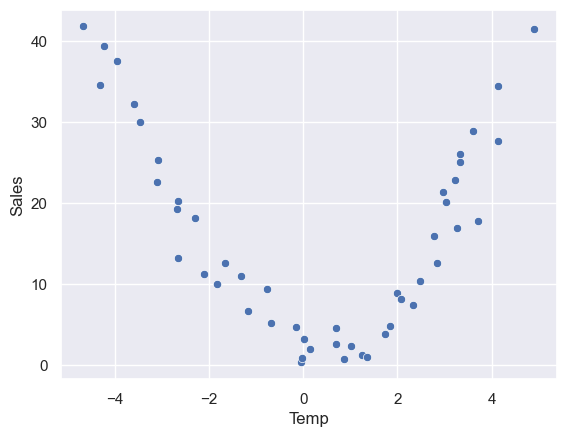

In [ ]:
sns.set()

sns.scatterplot(df, x="Temp", y="Sales")



In [ ]:
# 3. توابع مورد نیاز
def polynomial_features(X, degree):
    """افزودن ویژگی‌های چند جمله‌ای به داده‌ها"""
    return np.vstack([X**i for i in range(degree + 1)]).T

def predict(X_poly, weights):
    """پیش‌بینی با استفاده از وزن‌ها"""
    return X_poly.dot(weights)

def MSE(X, y, weights):
    m = len(y)
    predictions = predict(X, weights)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def compute_gradient(X, y, weights):
    """محاسبه گرادیان"""
    m = len(y)
    predictions = predict(X, weights)
    gradient = (1 / m) * X.T.dot(predictions - y)
    return gradient


def gradient_descent(X, y, weights, learning_rate, iterations):
    cost_history = []
    weights_history = []  # ذخیره وزن‌ها

    for _ in range(iterations):
        # محاسبه گرادیان
        gradient = compute_gradient(X, y, weights)

        # به‌روزرسانی وزن‌ها
        weights -= learning_rate * gradient

        # محاسبه هزینه
        cost = MSE(X, y, weights)
        cost_history.append(cost)
        weights_history.append(weights.copy())  # ذخیره وزن‌های فعلی

    return weights, cost_history, weights_history  # بازگشت وزن‌ها و تاریخچه وزن‌ها

In [ ]:
X = df['Temp'].values 
y = df['Sales'].values 

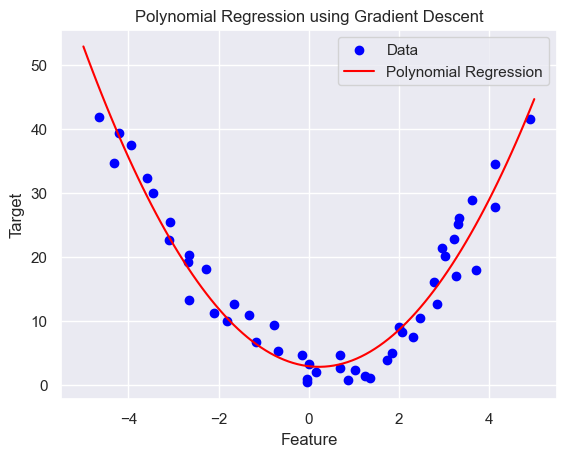

Final Cost: 5.003195791762874


In [ ]:

X = df['Temp'].values 
y = df['Sales'].values 

def predict_by_x(x, weights):
    return sum(weights*[1,x,x**2])


degree = 2
X_poly = polynomial_features(X, degree)

weights = np.random.randn(X_poly.shape[1]) 
learning_rate = 0.01
iterations = 1000

weights, cost_history, weights_history = gradient_descent(X_poly, y, weights, learning_rate, iterations)

plt.scatter(X, y, color='blue', label='Data')
X_plot = np.linspace(-5, 5, 100)
# X_plot_poly = polynomial_features(X_plot, degree)
# y_plot = predict(X_plot_poly, weights)
y_plot = pd.Series(X_plot).apply(lambda x : predict_by_x(x, weights=weights))
plt.plot(X_plot, y_plot, color='red', label='Polynomial Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression using Gradient Descent')
plt.legend()
plt.show()

print(f"Final Cost: {cost_history[-1]}")






In [ ]:
X_plot_poly

array([[ 1.00000000e+00, -5.00000000e+00,  2.50000000e+01],
       [ 1.00000000e+00, -4.89898990e+00,  2.40001020e+01],
       [ 1.00000000e+00, -4.79797980e+00,  2.30206101e+01],
       [ 1.00000000e+00, -4.69696970e+00,  2.20615243e+01],
       [ 1.00000000e+00, -4.59595960e+00,  2.11228446e+01],
       [ 1.00000000e+00, -4.49494949e+00,  2.02045710e+01],
       [ 1.00000000e+00, -4.39393939e+00,  1.93067034e+01],
       [ 1.00000000e+00, -4.29292929e+00,  1.84292419e+01],
       [ 1.00000000e+00, -4.19191919e+00,  1.75721865e+01],
       [ 1.00000000e+00, -4.09090909e+00,  1.67355372e+01],
       [ 1.00000000e+00, -3.98989899e+00,  1.59192939e+01],
       [ 1.00000000e+00, -3.88888889e+00,  1.51234568e+01],
       [ 1.00000000e+00, -3.78787879e+00,  1.43480257e+01],
       [ 1.00000000e+00, -3.68686869e+00,  1.35930007e+01],
       [ 1.00000000e+00, -3.58585859e+00,  1.28583818e+01],
       [ 1.00000000e+00, -3.48484848e+00,  1.21441690e+01],
       [ 1.00000000e+00, -3.38383838e+00

In [ ]:
weights_history = np.array(weights_history)  # تبدیل به آرایه NumPy برای راحتی

plt.figure(figsize=(12, 6))
plt.plot(weights_history[:, 0], label='Weight w0', color='blue')
plt.plot(weights_history[:, 1], label='Weight w1', color='orange')
plt.plot(weights_history[:, 2], label='Weight w2', color='red')
plt.xlabel('Iterations')
plt.ylabel('Weights')
plt.title('Change of Weights During Gradient Descent')
plt.legend()
plt.grid()
plt.show()

NameError: name 'weights_history' is not defined

In [ ]:
plt.plot(cost_history)

NameError: name 'cost_history' is not defined

In [ ]:
w0_range = np.linspace(-400, 400, 50)
w1_range = np.linspace(-200, 200, 50)
w2_range = np.linspace(-100, 100, 50)  # وزن برای X^2

# 5. محاسبه تابع هزینه برای هر ترکیب وزن
cost_matrix = np.zeros((len(w0_range), len(w1_range), len(w2_range)))

for i, w0 in enumerate(w0_range):
    for j, w1 in enumerate(w1_range):
        for k, w2 in enumerate(w2_range):
            weights = np.array([w0, w1, w2])  # وزن‌ها
            cost_matrix[i, j, k] = MSE(X_poly, y, weights)

# 6. ترسیم تابع هزینه به صورت سه‌بعدی با رنگ
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# انتخاب یک بعد (مثلاً w2 ثابت باشد) برای رسم
w2_fixed = 0  # مقدار ثابت برای w2
cost_matrix_fixed = cost_matrix[:, :, np.argmin(np.abs(w2_range - w2_fixed))]  # انتخاب صفحه ای که w2 ثابت است

W0, W1 = np.meshgrid(w0_range, w1_range)

# ترسیم
ax.plot_surface(W0, W1, cost_matrix_fixed.T, cmap='viridis', edgecolor='none')

# 7. تنظیمات گراف
ax.set_xlabel('Weight w0')
ax.set_ylabel('Weight w1')
ax.set_zlabel('Mean Squared Error (MSE)')
ax.set_title(f'3D Surface Plot of MSE (w2 fixed at {w2_fixed})')

plt.show()

NameError: name 'MSE' is not defined